# Филтирање на слика во фреквенциски домен
## Теорија

За да филтрираме слика во фреквенциски домен потребно е да ја помножиме сликата во фреквенциски домен со филтерот (кернел) кој е исто така во фреквенциски домен.

$$I_{f,filt}=HI_f$$

За таа цел потребно е да се вметне Octave функција која ќе креира “Band pass gaussian filter” во фреквенциски домен. Bandpass гаусовиот филтер во фреквенциски домен е дефиниран со равенката: 

$$H(i,j)=e^{-\frac{d(i,j)^2}{f_{h}^{2}}}(1-e^{-\frac{d(i,j)^2}{f_{l}^{2}}})$$

Каде што 𝑑(𝑖,𝑗) е евклидовото растојанието на даден пиксел од центарот на сликата, додека 𝑓ℎ и 𝑓 𝑙 се праговите на високите и ниските фреквенции кои сакаме да ги филтрираме. 
 
Конверзија на 2D сликата од просторен во фреквенциски домен се прави со користење на Фуриева трансформација. Фуриевата трансформација е дефинирана како:

$$F(u,v)=\int{\int_{-\infty}^{\infty}} f(x,y) e^{-i2\pi(ux+vy)} dxdy$$

А во дискретниот домен горната равенка може да биде преведена како 

$$F(u,v)=\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty} f[m,n]\cdot e^{-i2\pi(umx_0+vny_0)}$$

Конверзија на 2D сликата од фреквенциски во просторен домен се прави со користење на инверзна Фуриева трансформација. Инверзната Фуриева трансформација е дефинирана како:

$$f(x,y)=\int{\int_{-\infty}^{\infty}} F(u,v) e^{i2\pi(ux+vy)} dxdy$$

А во дискретниот домен горната равенка може да биде преведена како

$$f(x,y)=\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty} F(m,n)\cdot e^{i2\pi(xmu_0+ynv_0)}$$

## Имплементација и визуелизација

Вчитување на оригиналната слика:

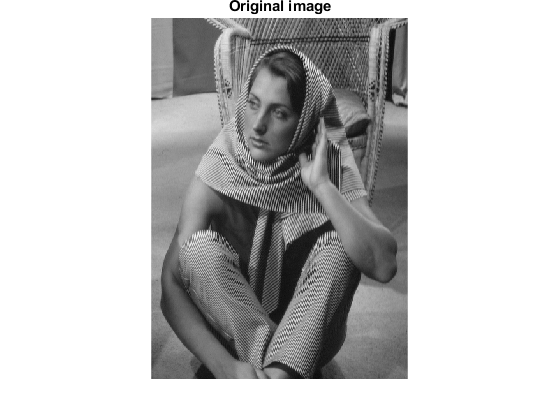

In [12]:
original_image=imread('Barbara.tif');
imshow(original_image);title("Original image");

Фуриева трансформација на слика се прави на следниот начин:

In [13]:
fft_image = fftshift(fft2(double(original_image)));

Функција за филтерот кој се искористува при филтрирање на сликата:

In [14]:
%%file create_filter.m

function filter = create_filter(nx,ny,d0,d1)
    filter = ones(nx,ny);
    for i = 0:nx-1
        for j = 0:ny-1
            dist= sqrt((i-nx/2)^2 + (j-ny/2)^2);
            filter(i+1,j+1) = exp(-(dist^2)/(d1^2)).*(1.0-exp(-(dist^2)/(d0^2)));
        end
    end
    filter(nx/2+1,ny/2+1)=1;
end

Created file 'C:\Users\Ana Marija\Desktop\faks\mnivi\Domasna\Domasna-zadaca-MNIVI\create_filter.m'.


Matlab код за филтрирање на сликата и кернелот во фреквенциски домен. Резултатот од извршување на овој код е филтрираната слика Barbara.tif (filtered_image), која се добива како инверзна Фуриева трансформација на производот од филтерот и сликата во фреквенциски домен. Дополнително, се прави филтрирање и на кернелот во фреквенциски домен, при што резултатот се добива во променливата filter_kernel.

In [ ]:
clear all
%read image
im = double(imread('Barbara.tif'));
%size of the image
[nx ny] = size(im);
%Transform the image from spatial to frequency domain
im_fft = fftshift(fft2(im));
% Create Gaussian bandpass kernels, in frequency domain, for 20 different cut off frequencies and filter the image
p=1;
for i = 1:10:101
q=1;
    for j = 1:10:101
        %Create the bandpass kernel
        tmp1 = create_filter(nx,ny,i,j);
        %Filter the image with the bandpass kernel and transform it back to spatial domain
        tmp = mat2gray(abs(ifft2(ifftshift(tmp1.*im_fft))));
        %Save the filtered image (in spatial domain) and kernel (in frequency domain) for visualization 
        filtered_image(p,q,:) = tmp(:);
        filter_kernel(p,q,:) = tmp1(:);
        q=q+1;
    end
    p=p+1;
end

save filtered_image
save filter_kernel

Python код за креирање на Range slider widget со кој можеме да ја трансформираме сликата Barbara.tif.

In [53]:
%matplotlib nbagg
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import scipy.io as sio

#Create RangeSlider widget
slider = widgets.IntRangeSlider(
    value=[0, 10],
    min=0,
    max=10,
    step=1,
    description='Frequency cutoffs:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout={'width': '100%', 'height':'100%'}
)

#display(value)

filtered_image = sio.loadmat('filtered_image.mat')
filter_kernel = sio.loadmat('filter_kernel.mat')

filt_images = filtered_image['filtered_image']
filt_k = filter_kernel['filter_kernel']

def slide(freq):
    plt.figure(figsize=(20,30))
    image = np.fliplr(np.rot90(filt_images[freq[0]][freq[1]][0:].reshape(402,566),3))
    kernel = np.fliplr(np.rot90(filt_k[freq[0]][freq[1]][0:].reshape(402,566),3))
    plt.axis("off")
    plt.imshow(np.concatenate((image,kernel), axis=1),cmap="gray");

widgets.interactive(slide, freq=slider)

interactive(children=(IntRangeSlider(value=(0, 10), continuous_update=False, description='Frequency cutoffs:',…